In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot # This is for Cook's Distance
import statsmodels.formula.api as smf
import seaborn as sns

In [30]:
cars = pd.read_csv('ToyotaCorolla.csv', encoding = 'latin-1')
cars = cars[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [31]:
cars.sample(3)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
328,12950,35,33258,110,1600,5,5,85,1075
192,4750,44,131273,69,1800,5,5,64,1110
663,9500,68,110287,110,1600,3,5,69,1050


In [32]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [33]:
# Split the Data into X and Y
Y = cars[['Price']]
X = cars[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [34]:
X.isna().sum()

Y.isna().sum()

Price    0
dtype: int64

In [35]:
cars.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


## From the above correlation matrix we can infer that there is no significant Collinearity issue in the dataset.

In [36]:
#Build the Model
model = smf.ols('Y~X', data = cars).fit()

(model.rsquared, model.aic, model.rsquared_adj)

(0.8637627463428191, 24769.07664007625, 0.8629989775766962)

In [37]:
#Parameter
print(model.params)

#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept   -5573.106358
X[0]         -121.658402
X[1]           -0.020817
X[2]           31.680906
X[3]           -0.121100
X[4]           -1.616641
X[5]          594.319936
X[6]            3.949081
X[7]           16.958632
dtype: float64
Intercept    -3.948666
X[0]        -46.511852
X[1]        -16.621622
X[2]         11.241018
X[3]         -1.344222
X[4]         -0.040410
X[5]          3.016007
X[6]          3.014535
X[7]         15.879803
dtype: float64 
 Intercept     8.241949e-05
X[0]         3.354724e-288
X[1]          7.538439e-57
X[2]          3.757218e-28
X[3]          1.790902e-01
X[4]          9.677716e-01
X[5]          2.606549e-03
X[6]          2.619148e-03
X[7]          2.048576e-52
dtype: float64


In [38]:
model1 = smf.ols('Y~Doors', data = cars).fit()

print(model1.rsquared, model1.aic, model1.rsquared_adj)

model2 = smf.ols('Y~cc', data = cars).fit()
print(model2.rsquared, model2.aic, model2.rsquared_adj)

0.034345559431097517 27567.35077249662 0.033672160239626936
0.015974229213322366 27594.41368349079 0.015288018773443324


## There is no much difference in the model Accuracy when Doors and cc columns are included or Excluded, hence will keep the values, Even the Adjusted R square value has not a big difference


# Residual Analysis

# Test for Normality of Residuala(Q-Q Plot)

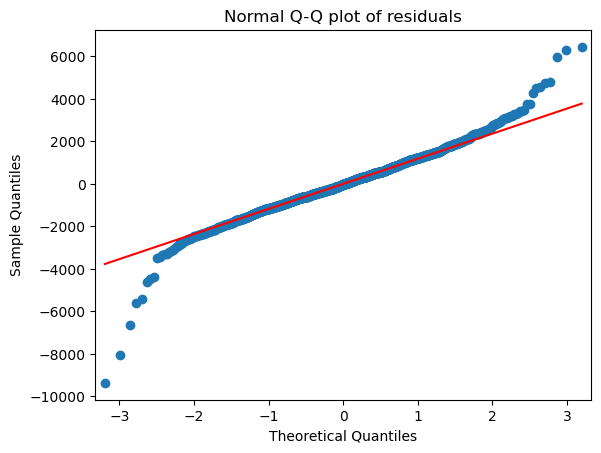

In [21]:
import statsmodels.api as sm

qqplot = sm.qqplot(model.resid,line='q')  # line=q draws 45 degree in the plot
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [22]:
list(np.where(model.resid>4000))

[array([ 109,  110,  111,  125,  147,  171,  523, 1058], dtype=int64)]

In [23]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

## Residual Plot for Homosecdasticity

In [24]:
def get_standardized_values(vals):
    return(vals - vals.mean())/vals.std()

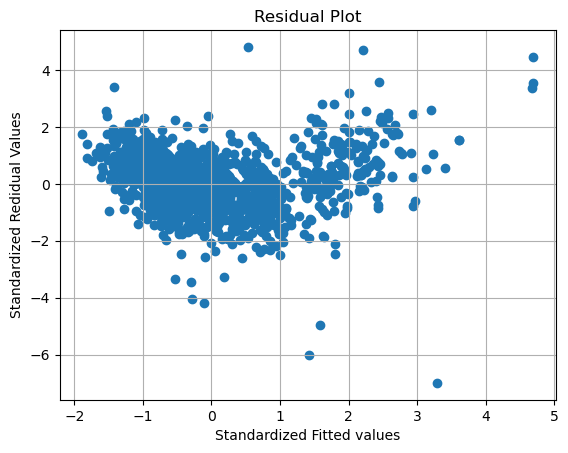

In [27]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

plt.title("Residual Plot")
plt.xlabel("Standardized Fitted values")
plt.ylabel("Standardized Redidual Values")
plt.grid()
plt.show()

## We can infer that its not the best model, There can be improvements either in Dataset or model

# Residual vs Regressors

eval_env: 1


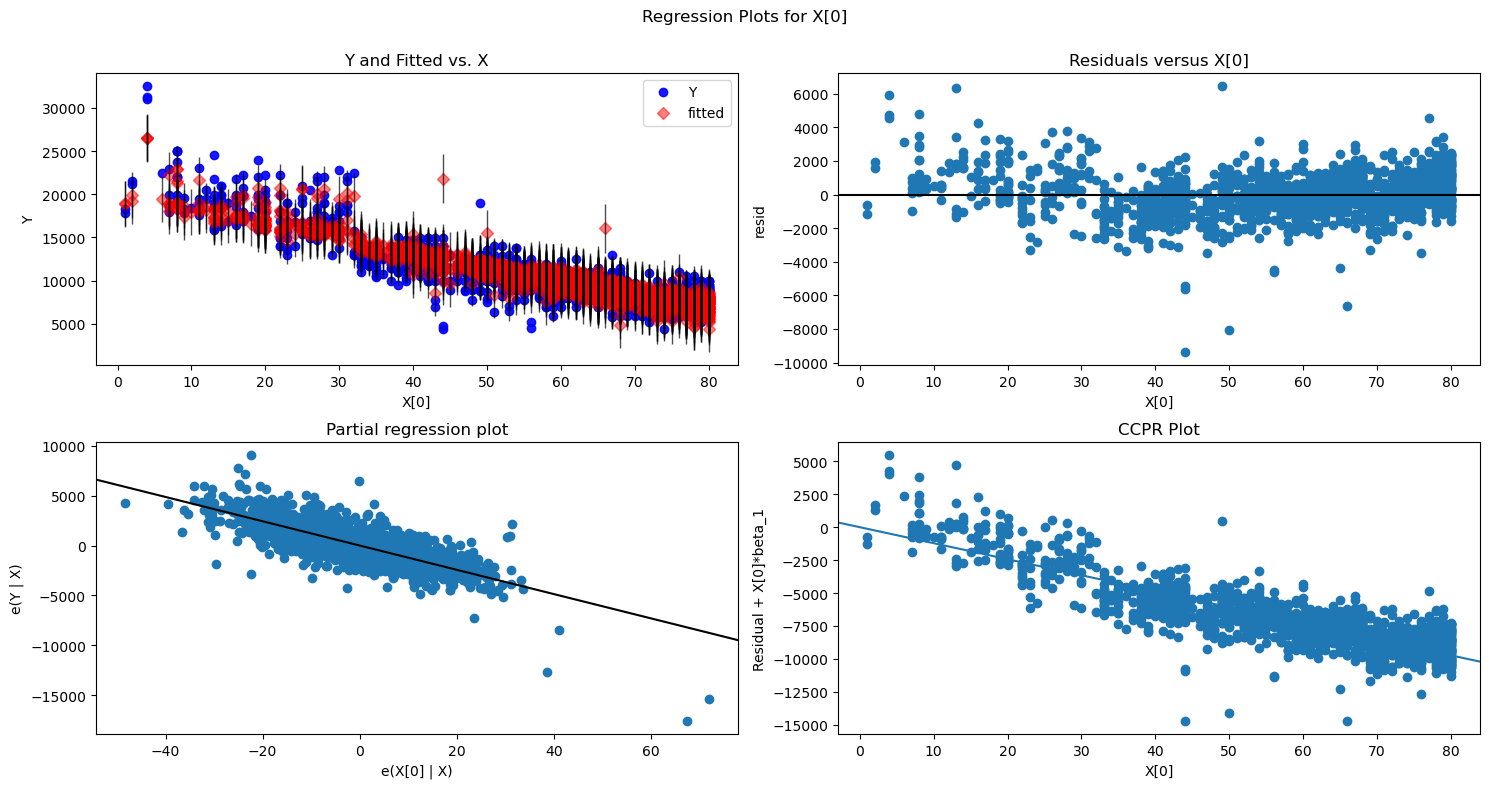

In [48]:
#AGE
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"X[0]",fig=fig)
plt.show()

eval_env: 1


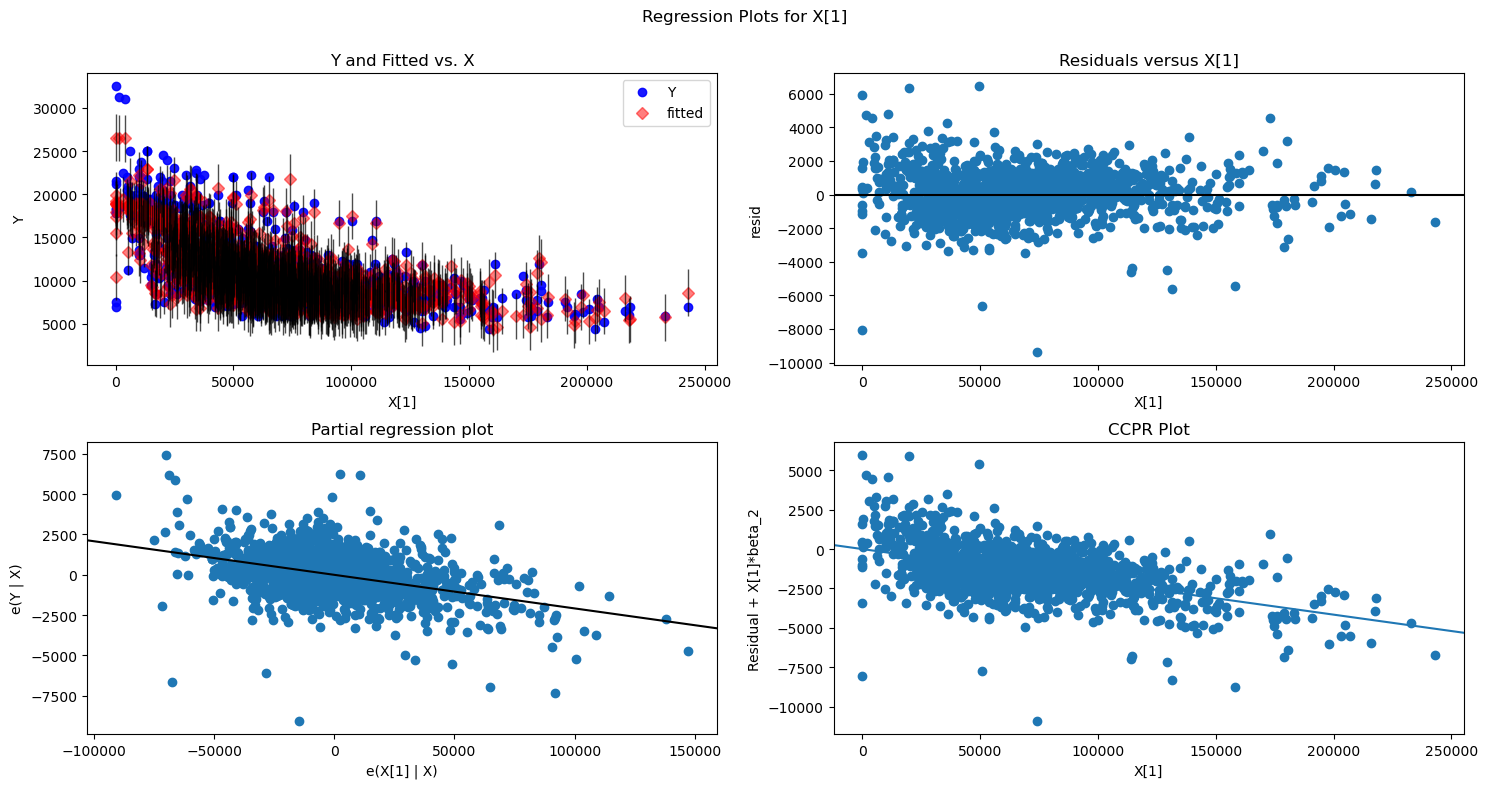

In [49]:
#KM
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"X[1]",fig=fig)
plt.show()

eval_env: 1


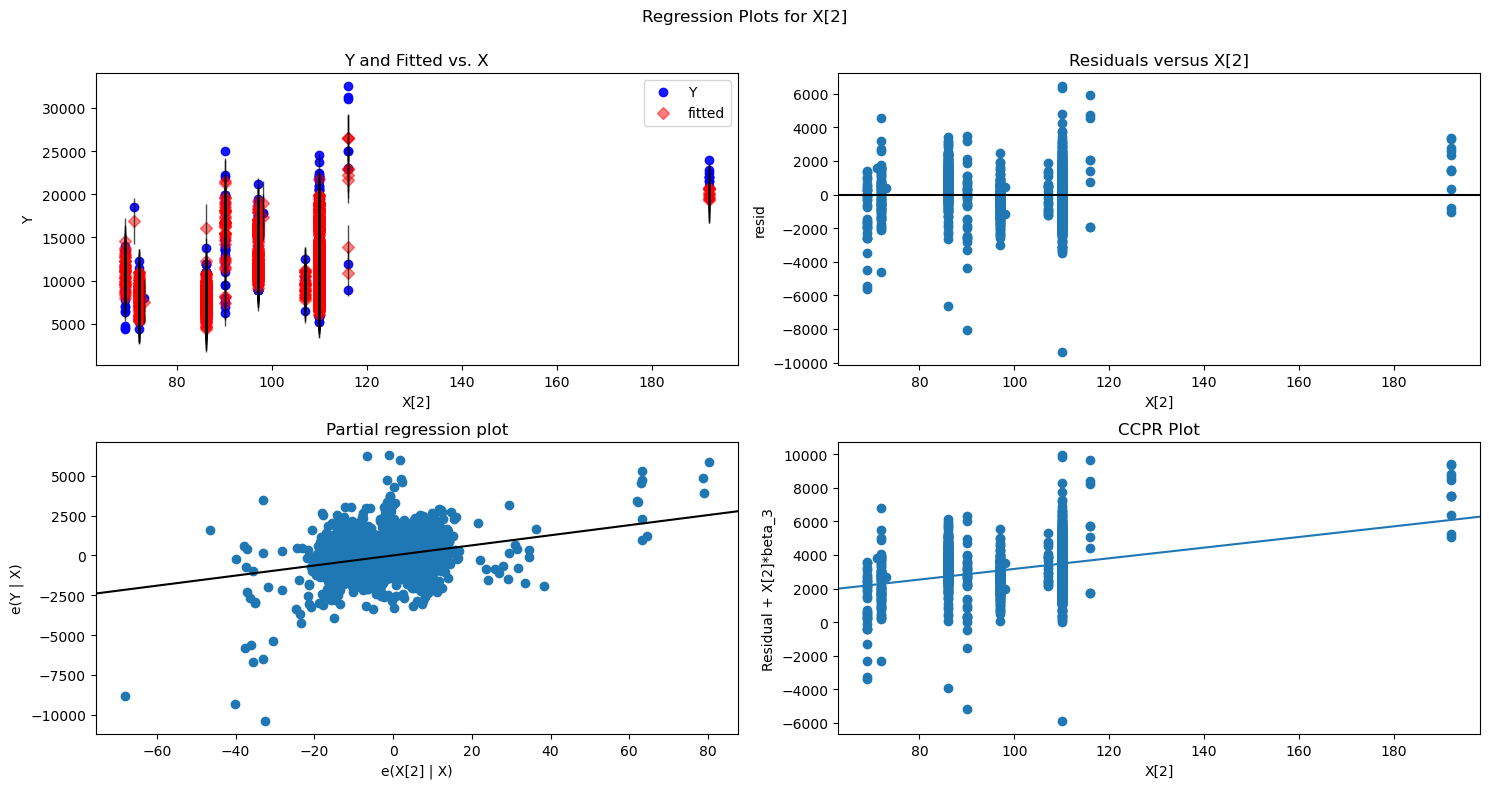

In [50]:
#HP
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"X[2]",fig=fig)
plt.show()

eval_env: 1


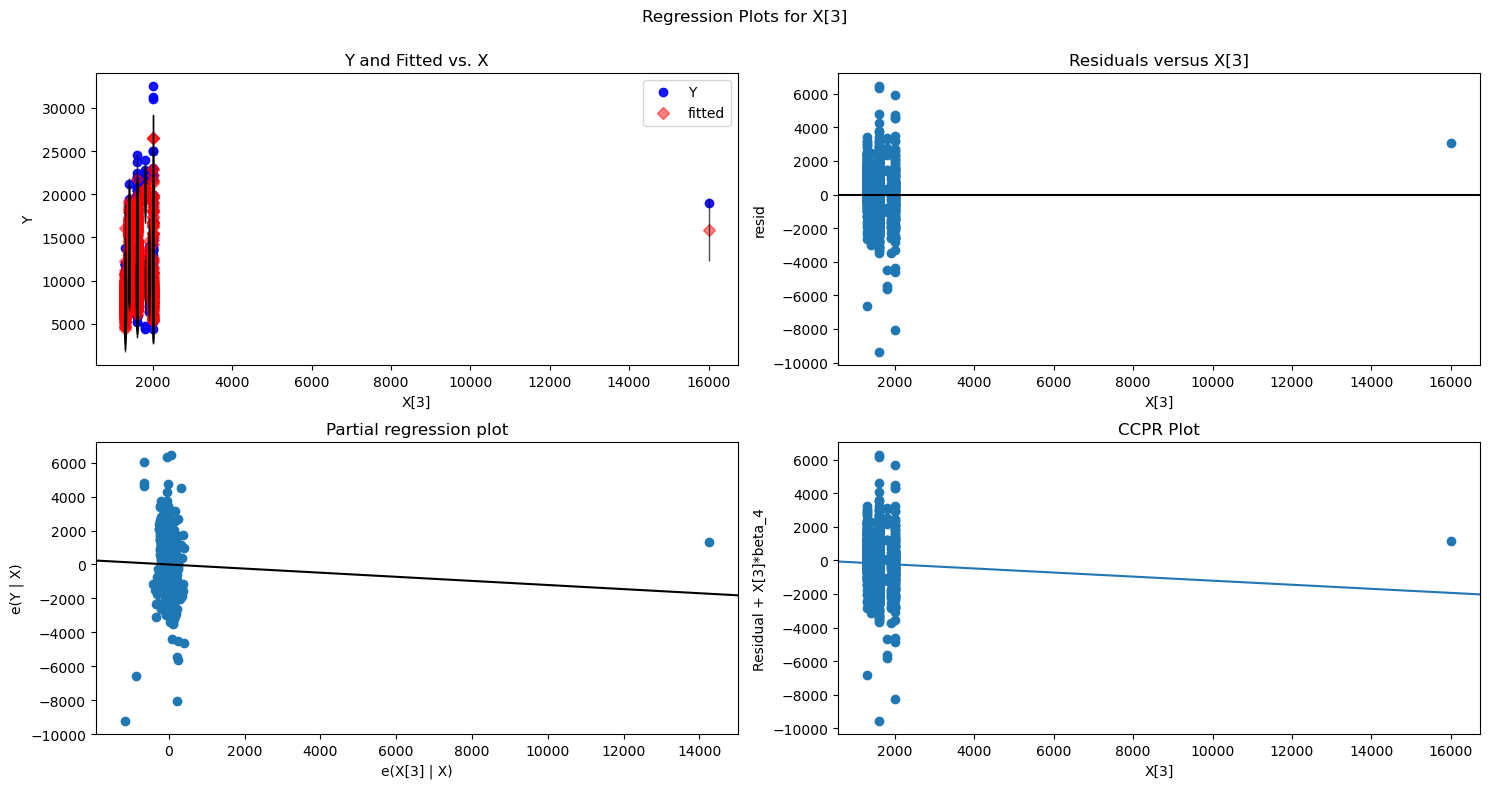

In [51]:
#CC
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"X[3]",fig=fig)
plt.show()

## We can infer that there is one outlier here, 16000cc, from Domain knowledge we can say practically 16000cc car does not exist, we can make it either 1600cc or drop the datapoint.

eval_env: 1


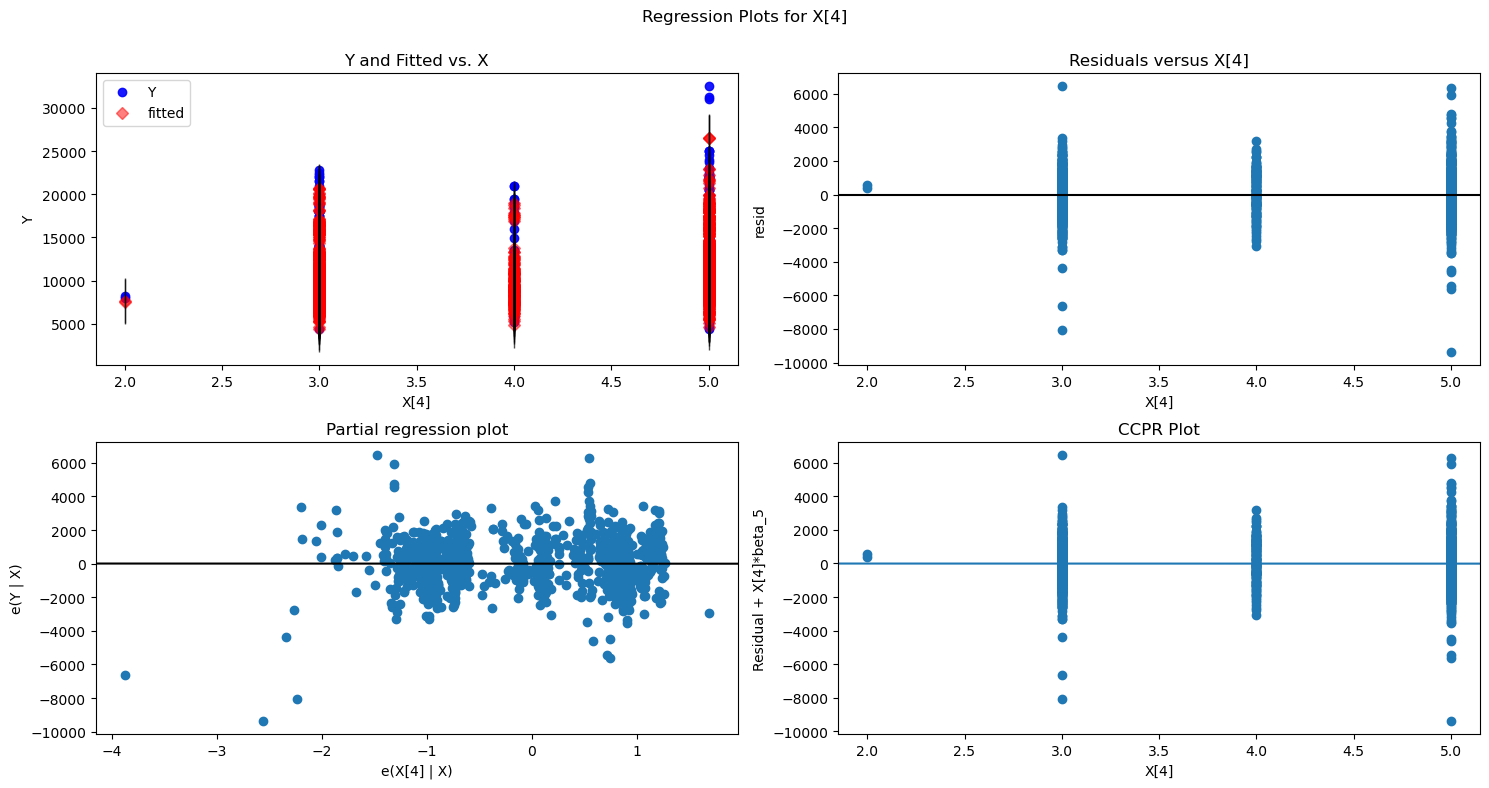

In [52]:
#Doors
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"X[4]",fig=fig)
plt.show()

eval_env: 1


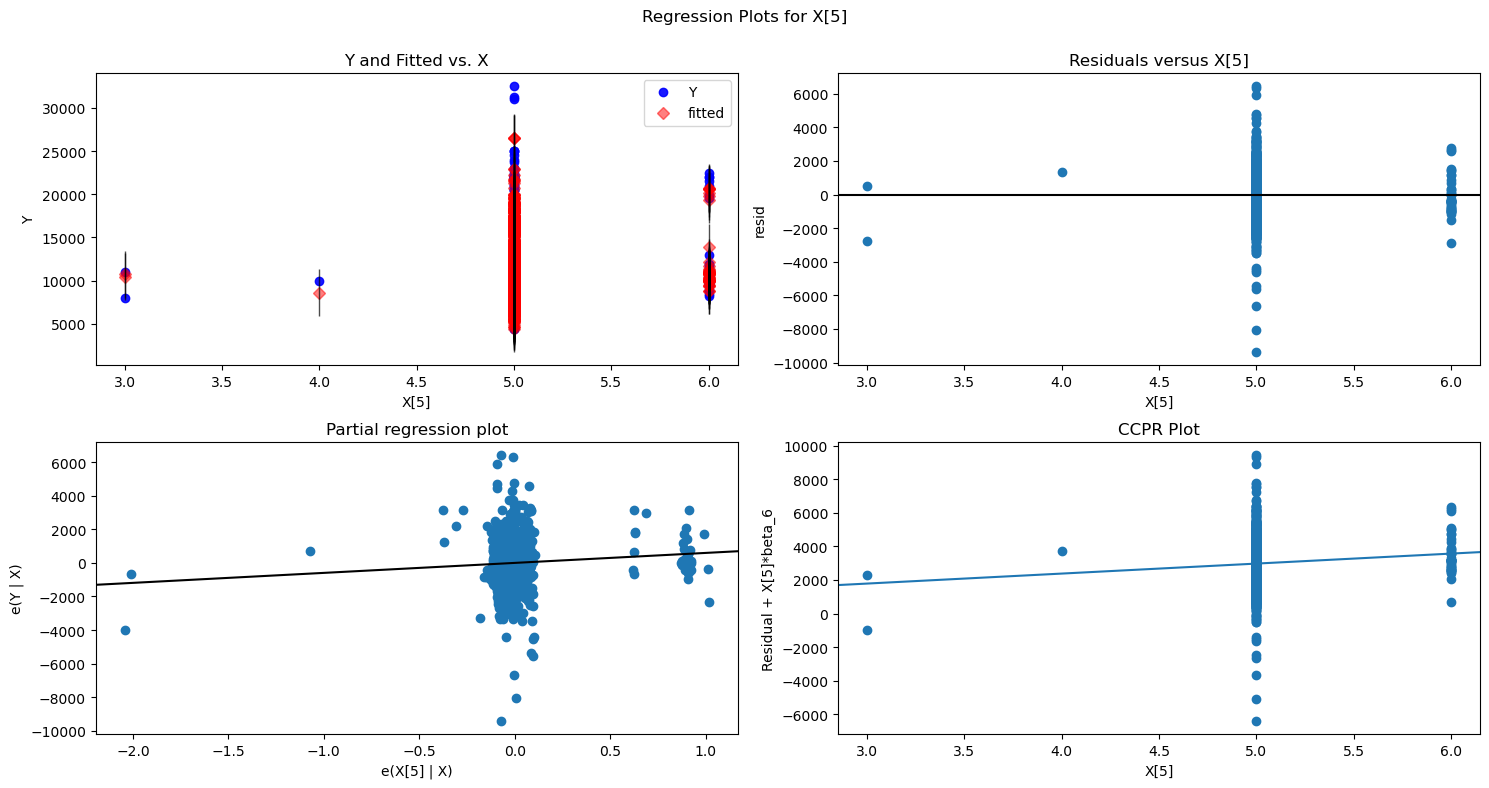

In [53]:
#Gears
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"X[5]",fig=fig)
plt.show()

eval_env: 1


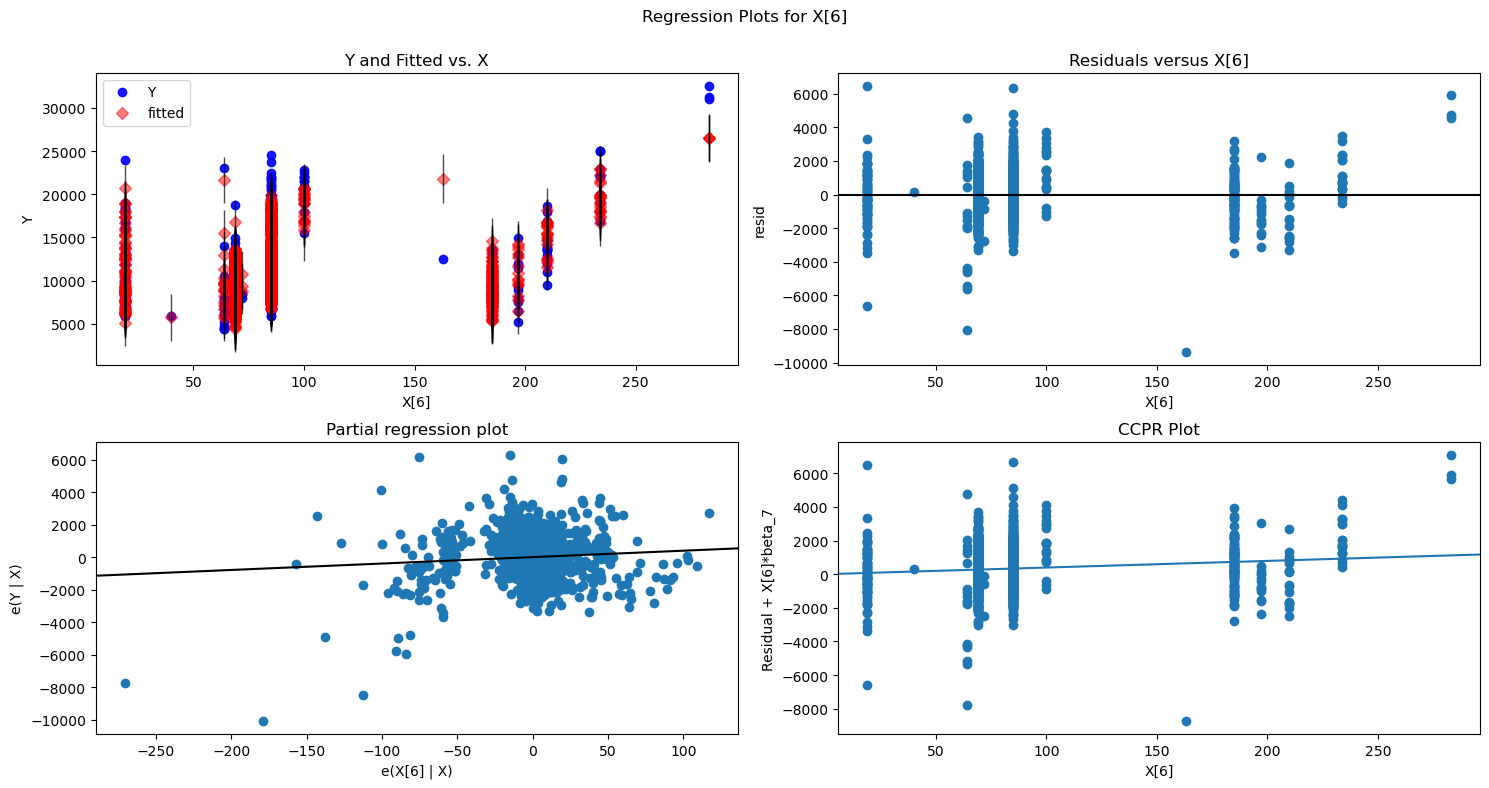

In [54]:
#Quarterly Tax
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"X[6]",fig=fig)
plt.show()

eval_env: 1


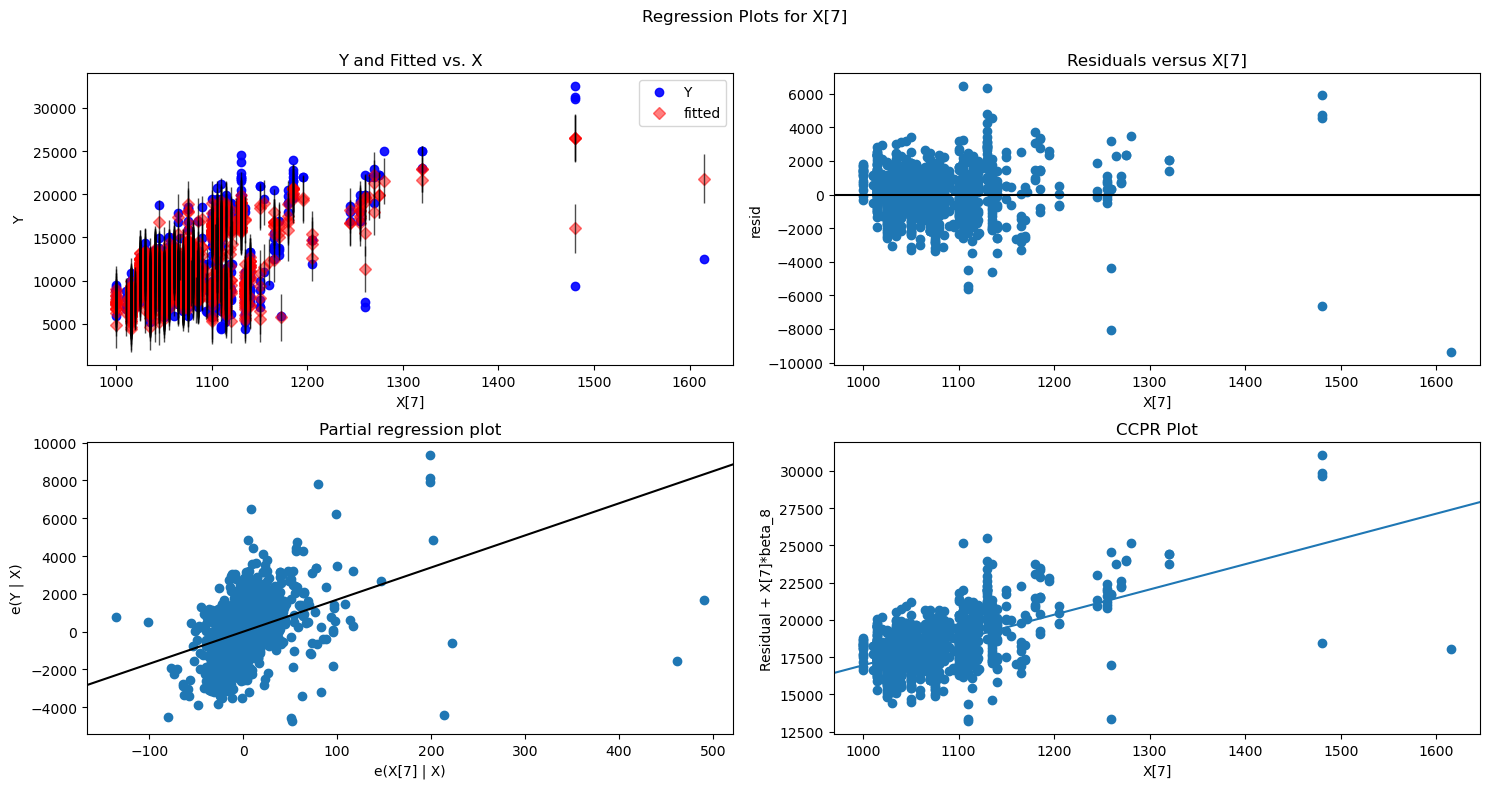

In [55]:
# Weight
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"X[7]",fig=fig)
plt.show()

## All the input variables seems to be indpendent of Error, that is there is no pattern, Hence we can proceed with Linear Regression Model

## Identifying the Outliers/High Influence points

In [11]:
#Cooks Distance

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

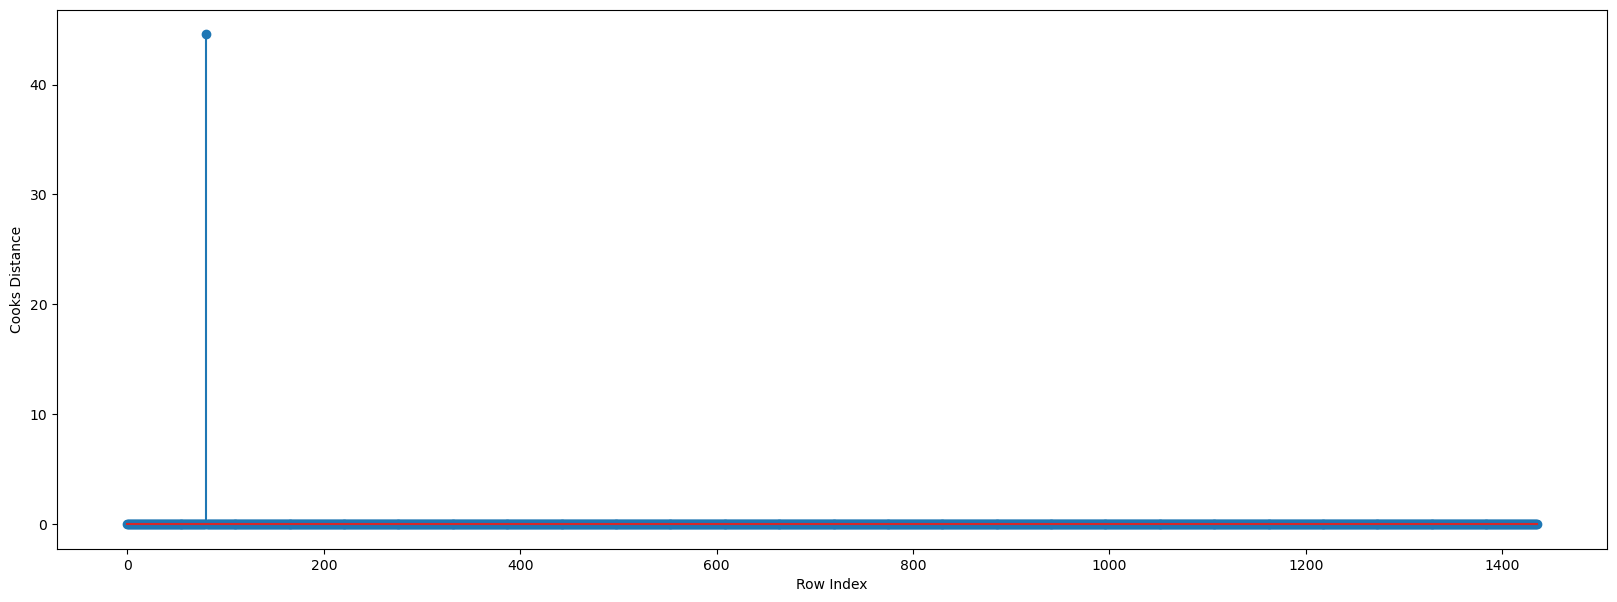

In [12]:
#Plot the influencers values using stem plot

fig = plt.subplots(figsize= (20,7))
plt.stem(np.arange(len(cars)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [13]:
#index and value of influencer where c is more than 0.5
(np.argmax(c), np.max(c))

(80, 44.574859648559624)

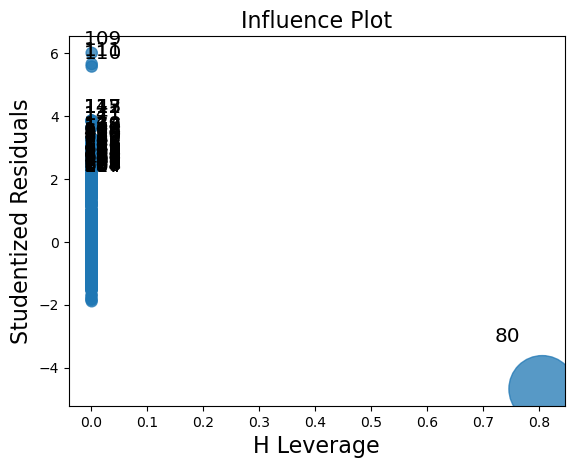

'From the above plot its evident that the Data point # 80 is oulier, Hence removing that data point'

In [14]:
"""#High Influence Points"""

from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

"""From the above plot its evident that the Data point # 80 is oulier, Hence removing that data point"""

In [15]:
cars[cars.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [16]:
# Load the Data
cars_new = cars

# Discard the data points which are influencers and reassign the row number (reset_index())

cars1 = cars_new.drop(cars_new.index[[80]], axis =0). reset_index()

Y= cars1[['Price']]
X = cars1[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

cars1

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [17]:
#Drop the Original Index
cars1= cars1.drop(['index'], axis = 1)

In [18]:
#Build the Model
# Exclude WT
final_model_V = smf.ols('Y~X', data = cars1).fit()

(model.rsquared, model.aic, model.rsquared_adj)

model_influence = final_model_V.get_influence()
(c, _) = model_influence.cooks_distance

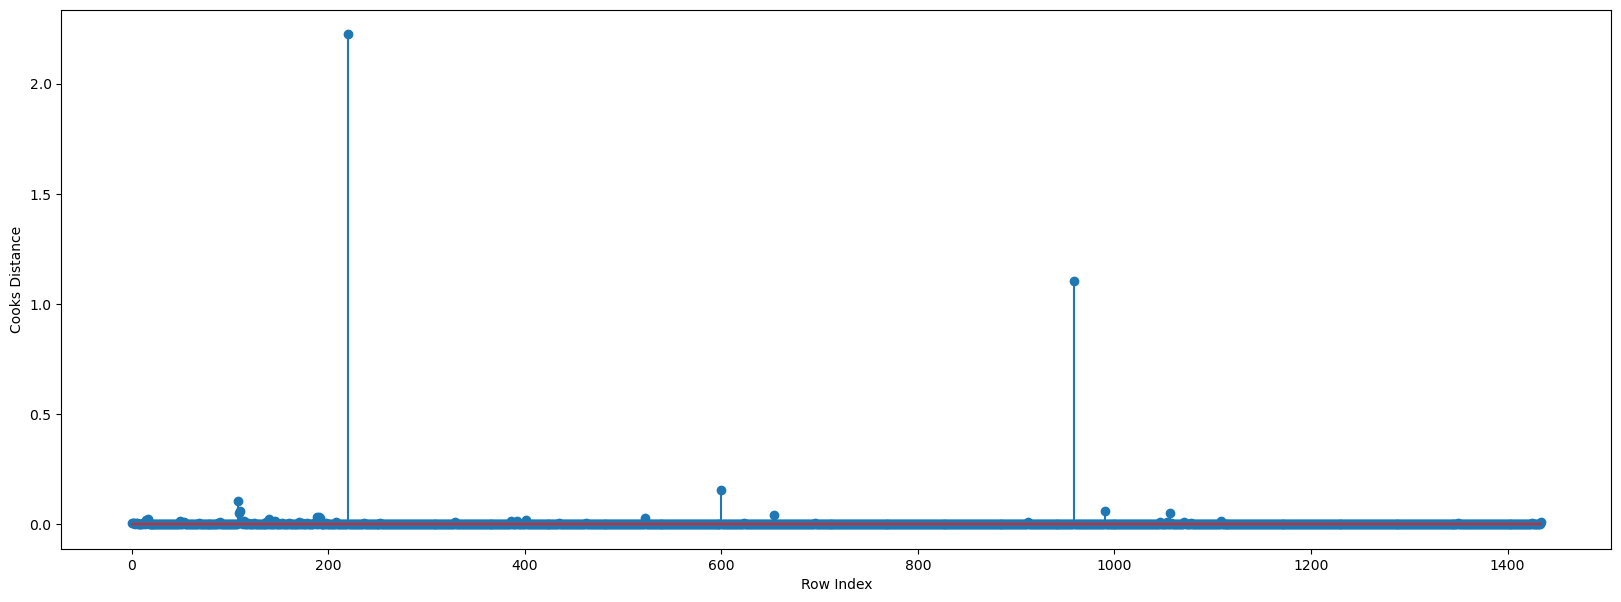

In [19]:
#Plot the influencers values using stem plot

fig = plt.subplots(figsize= (20,7))
plt.stem(np.arange(len(cars1)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

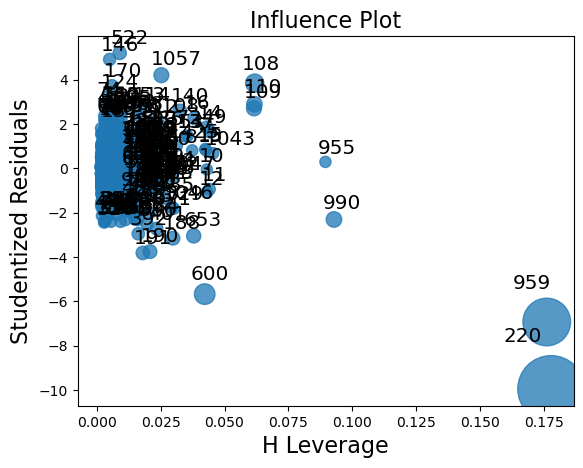

In [20]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_model_V)
plt.show()

In [21]:
# Load the Data
cars_new = cars1

In [22]:
# Discard the data points which are influencers and reassign the row number (reset_index())

cars2 = cars_new.drop(cars_new.index[[220,959]], axis =0). reset_index()

Y= cars2[['Price']]
X = cars2[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [23]:
#Drop the Original Index
cars2= cars2.drop(['index'], axis = 1)

In [24]:
#Build the Model
final_model = smf.ols('Y~X', data = cars2).fit()

(final_model.rsquared, final_model.aic, final_model.rsquared_adj)

(0.8851845904421739, 24469.715205158594, 0.8845395600513997)

## Model has r2 score of 0.88 which is good, also we have removed the outliers. Hence we can proceed with this model